<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/5_30_%ED%95%84%EC%82%AC_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념 정리]**

#**DBSCAN**
- 밀도 기반 군집화의 대표적인 알고리즘
- 데이터 밀도 차이 기반 알고리즘
- 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부--> 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분

#**고객 세그먼테이션**
- RECENCY (R): 가장 최근 상품 구입 일에서 오늘까지의 기간
- FREQUENCY (F): 상품 구매 횟수
- MONETARY VALUE(M): 총 구매금액

#**[코드 필사]**

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF['target'] = iris.target

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])[ 'dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_cluster_plot(cluster_model, X, label_col, iscenter=True):
    import numpy as np

    cluster_labels = X[label_col].values  # 컬럼에서 라벨 값 추출
    unique_labels = np.unique(cluster_labels)
    markers = ['o', 's', '^', 'x', '*', 'P', 'D']

    for label in unique_labels:
        label_mask = (cluster_labels == label)
        label_cluster = X[label_mask][['ftr1', 'ftr2']].values
        plt.scatter(label_cluster[:, 0], label_cluster[:, 1],
                    marker=markers[label % len(markers)], label=f'Cluster {label}')

    if iscenter and hasattr(cluster_model, 'cluster_centers_'):
        centers = cluster_model.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], s=200, c='white', edgecolor='k', marker='o')
        for idx, center in enumerate(centers):
            plt.scatter(center[0], center[1], s=100, c='black', marker=f'${idx}$')

    plt.title('Clustered Data')
    plt.legend()
    plt.grid(True)
    plt.show()


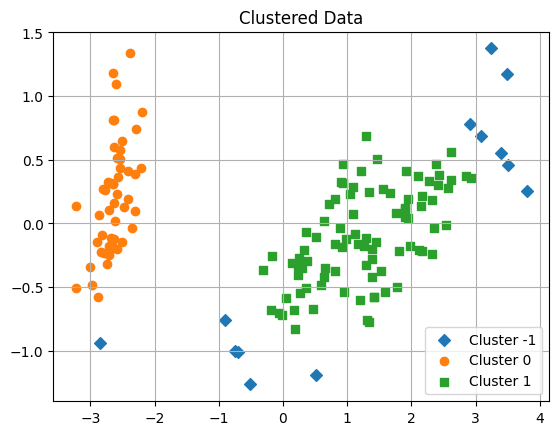

In [10]:
from sklearn.decomposition import PCA
 # 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_clusterj)lot( ) 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1 ]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [12]:
import matplotlib.pyplot as plt

def visualize_cluster_2d(X, cluster_column, centers=None, legend=True):
    """
    2D 시각화 함수: 주어진 클러스터 컬럼을 바탕으로 2D 평면에 클러스터를 시각화합니다.

    :param X: DataFrame
    :param cluster_column: 클러스터 레이블이 있는 컬럼 이름
    :param centers: 클러스터 센터 (선택사항)
    :param legend: 범례 표시 여부
    """
    plt.figure(figsize=(8, 6))
    unique_labels = X[cluster_column].unique()

    # 각 클러스터에 대해 다르게 색상 지정
    for label in unique_labels:
        cluster_data = X[X[cluster_column] == label]
        plt.scatter(cluster_data['ftr1'], cluster_data['ftr2'], label=f'Cluster {label}')

    # 센터 표시 (있다면)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centers')

    if legend:
        plt.legend()

    plt.title('Clustered Data (DBSCAN)')
    plt.xlabel('ftr1')
    plt.ylabel('ftr2')
    plt.grid(True)
    plt.show()


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


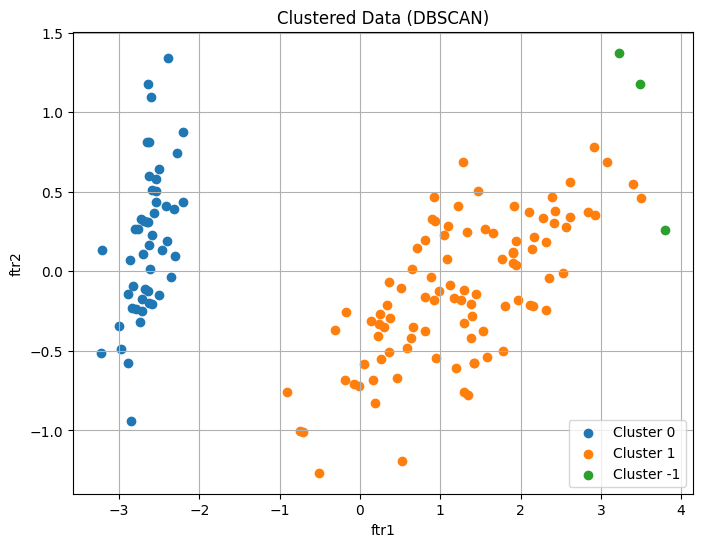

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster' ] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])[ 'dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_2d(irisDF, 'dbscan_cluster', centers=None, legend=True)

In [17]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

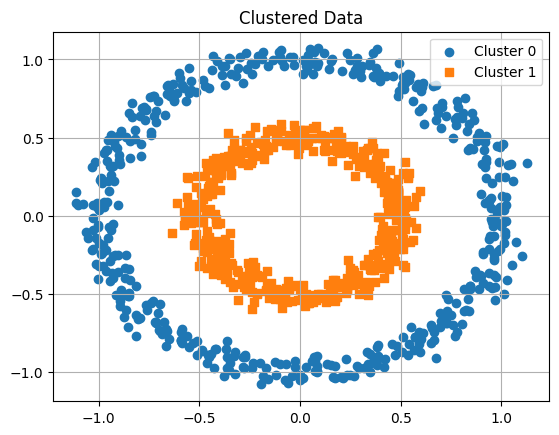

In [19]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,
                    factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=[ 'ftr1','ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

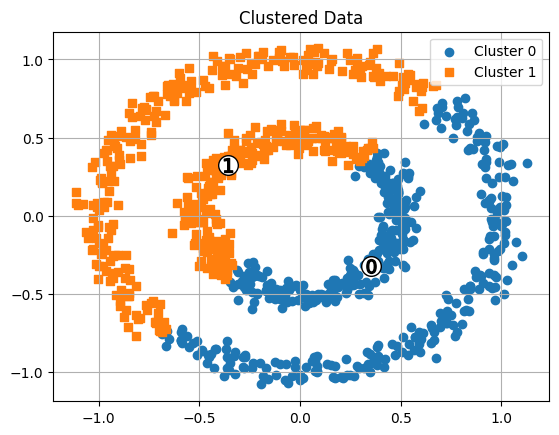

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster' ] = kmeans_labels
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

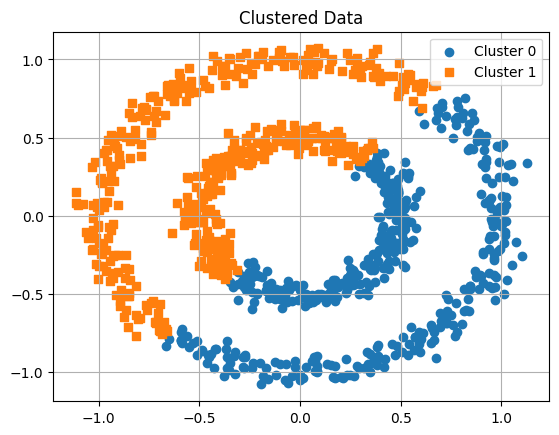

In [21]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

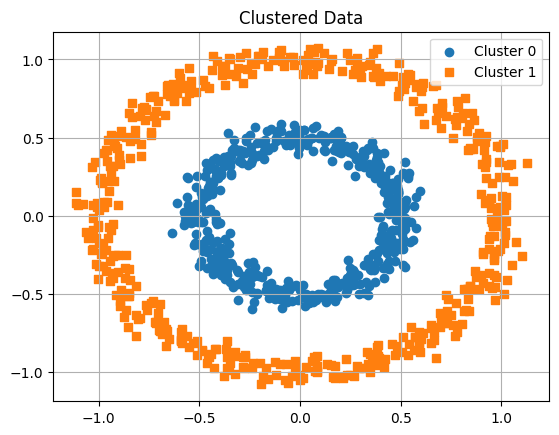

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster' ] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

In [29]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as pit
%matplotlib inline

# Excel 파일을 읽을 때 엔진을 명시적으로 지정
retail_df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [30]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [32]:
retail_df = retail_df[retail_df['Quantity' ] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID' ].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [33]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [34]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


In [37]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID' ] = retail_df['CustomerID' ].astype(int)
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby( 'CustomerID')[ 'sale_amount' ].sum().sort_values(ascending=False)[ :5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [38]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [39]:
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
 # groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate' :'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                    }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [40]:
import datetime as dt
cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df .shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


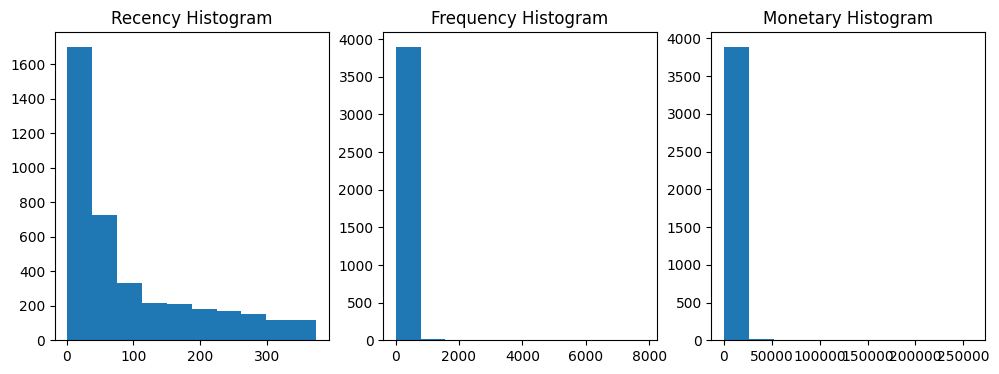

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [42]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler ().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df ['cluster_label' ] = labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


In [45]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def visualize_silhouette(cluster_range, X):
    silhouette_scores = []

    # 다양한 클러스터 개수에 대해 실루엣 점수 계산
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)

    # 실루엣 점수 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title("Silhouette Score for Different Cluster Sizes")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()


In [46]:
def visualize_kmeans_plot_multi(cluster_range, X):
    plt.figure(figsize=(16, 12))

    for i, n_clusters in enumerate(cluster_range):
        plt.subplot(2, 2, i + 1)  # 2x2 그리드에 그리기
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X)

        plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
        plt.title(f"KMeans with {n_clusters} Clusters")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()


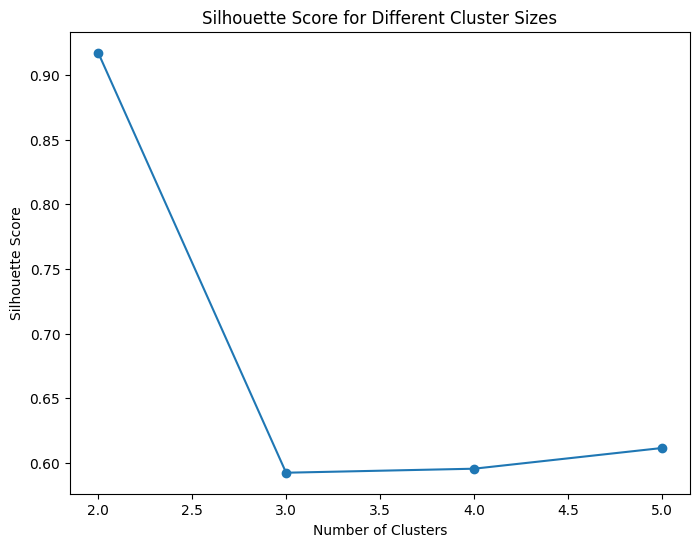

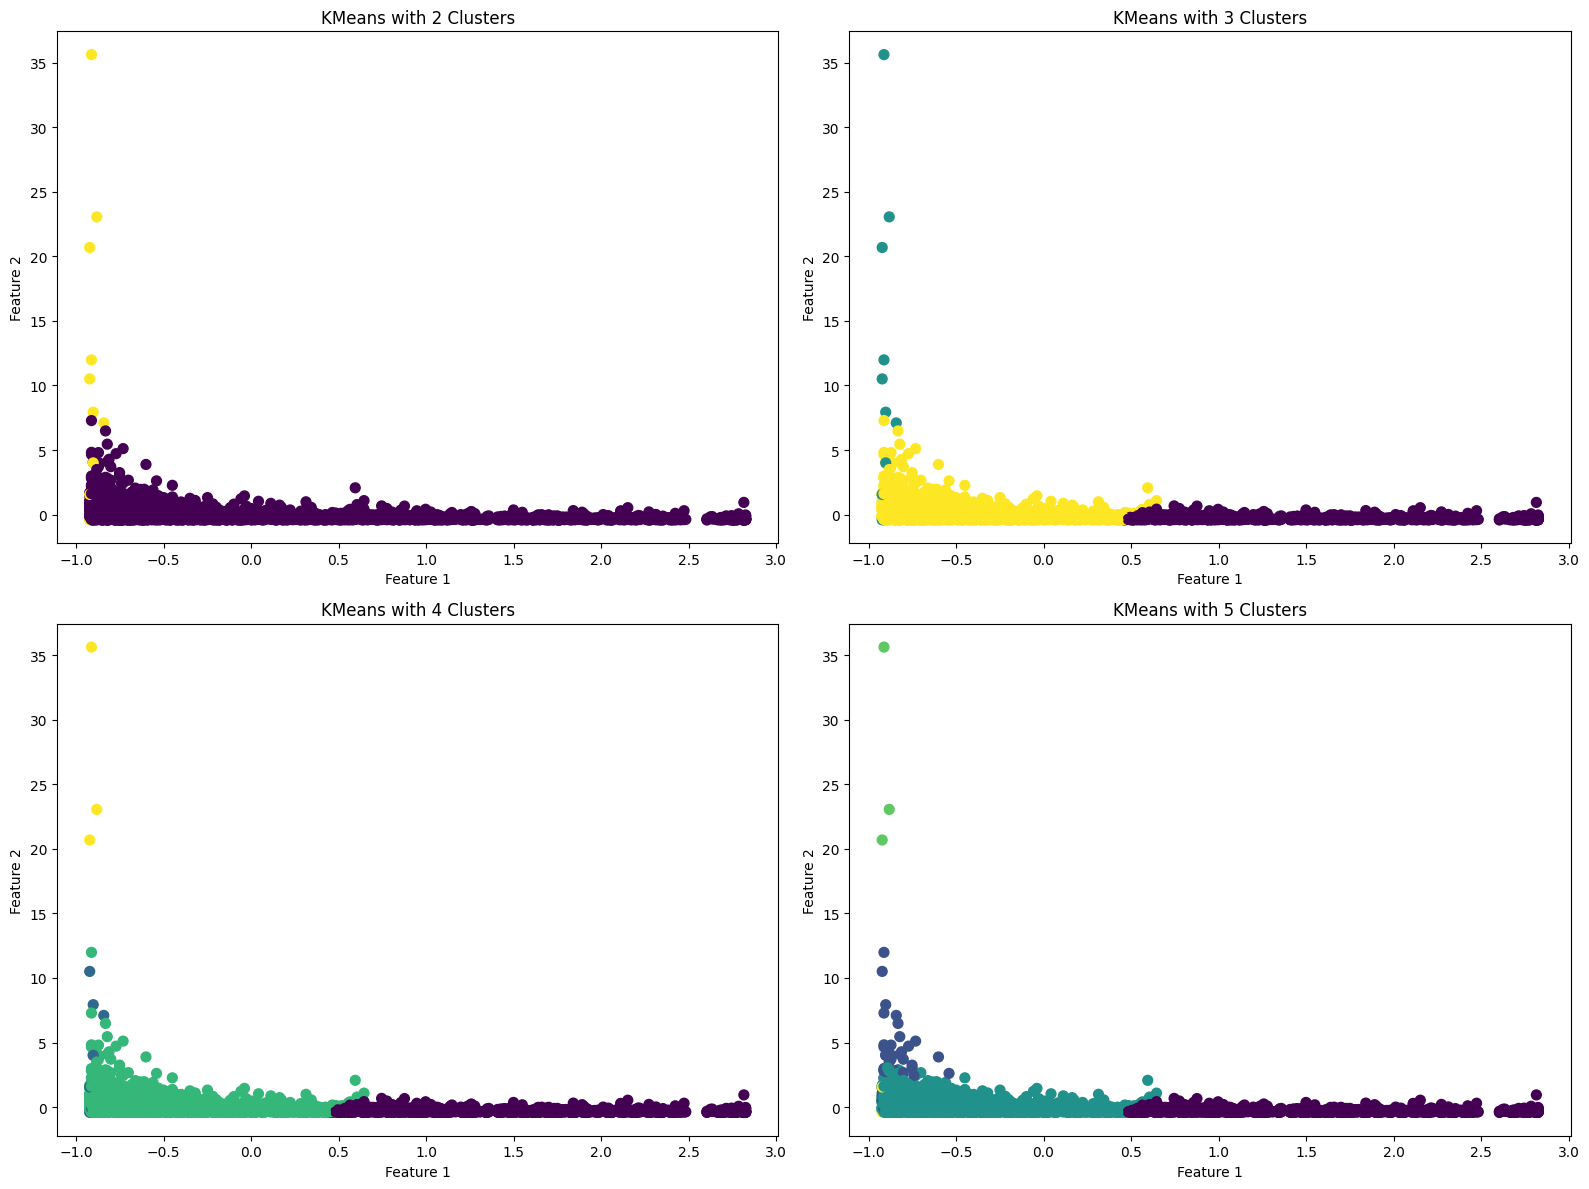

In [47]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
 # Recency, Frequecny, Monetary 칼럼에 np.loglpO로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np. log1p(cust_df ['Frequency' ])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])
 # Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df [ ['Recency_log', 'Frequency_log', 'Monetary_log' ]]. values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.303
